In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# simulate some data which is just the "ancestry" label (5 classes)
l=1e5 # genome length
n=250 # number of samples to start with
m=1000 # number of samples to generate
data=np.array([[(i % 5) for _ in range(int(l))] for i in range(int(n))])
data.shape

(250, 100000)

In [24]:
# take number of ancestors as Pois(2.86 * generation_time), over 1-10 generations
maxgen=4
n_splits=2+np.hstack([ss.poisson.rvs(2.86*gen, size=1000//maxgen) for gen in range(1,maxgen)])
# new individuals
new=[]
for j in n_splits:
    if j==0:
        new.append(list(data[np.random.choice(np.arange(n), size=1),:]))
    # sample breakpoints uniformly
    breaks=np.sort(l * ss.beta.rvs(a=1, b=1, size=j)).astype(int)
    # pick founders uniformly at random without replacement and stitch their labels together
    founds=np.random.choice(np.arange(n), size=j+1, replace=False)
    new.append(list(data[founds[0],:breaks[0]]))
    for i,found in enumerate(founds[1:-1]):
        new[-1]+=list(data[found, breaks[i]:breaks[i+1]])
    new[-1]+=list(data[founds[-1], breaks[-1]:])
# done!
data=np.vstack((data,np.array(new)))

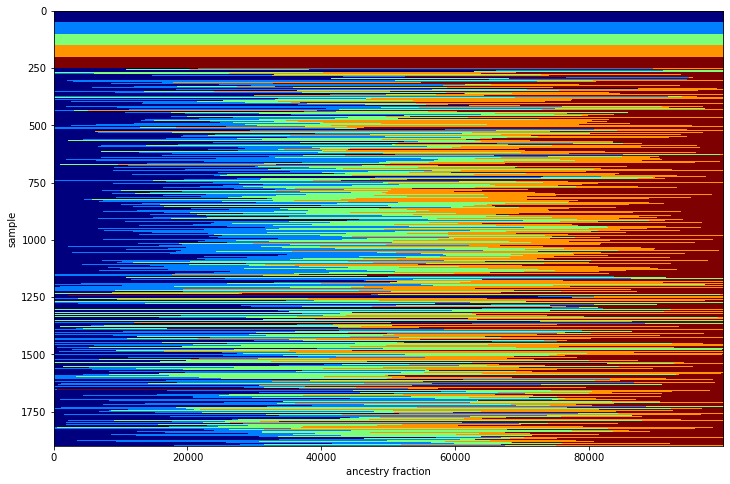

In [28]:
# plot ancestry fractions
plt.figure(figsize=(12,8))
plt.imshow(np.vstack((np.sort(data[:250,:], axis=0), np.sort(data[250:,:]))), 
           aspect='auto', cmap='jet')
plt.xlabel('ancestry fraction'); plt.ylabel('sample');

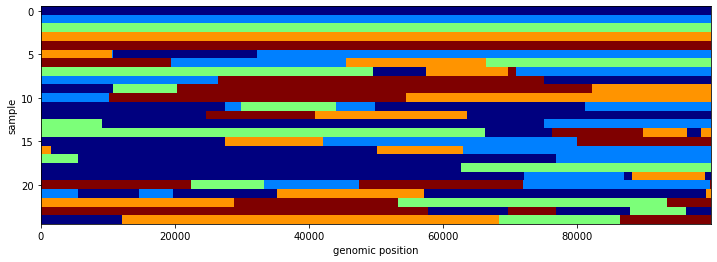

In [29]:
# plot "local ancestry"
plt.figure(figsize=(12,4))
plt.imshow(np.vstack((np.sort(data[:5,:], axis=0), data[251:271,:])), aspect='auto', cmap='jet')
plt.xlabel('genomic position'); plt.ylabel('sample');

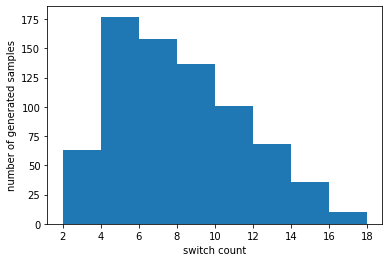

In [30]:
# and counts of breakpoints across pseudo-individuals
plt.hist(n_splits, bins=len(np.unique(n_splits))//2)
plt.xlabel('switch count'); plt.ylabel('number of generated samples');

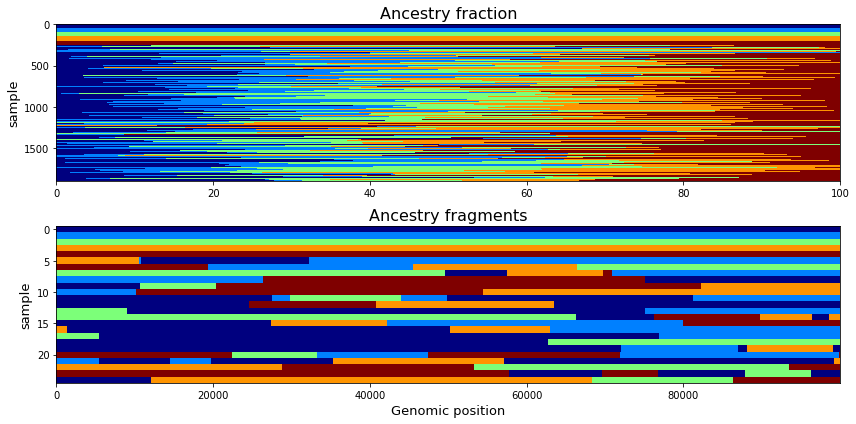

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.imshow(np.vstack((np.sort(data[:250,:], axis=0), np.sort(data[250:,:]))), 
           aspect='auto', cmap='jet')
plt.title('Ancestry fraction'); plt.xlabel(''); plt.ylabel('sample'); 
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0','20','40','60','80','100']); 
# plt.yticks([]);

plt.subplot(212)
plt.imshow(np.vstack((np.sort(data[:5,:], axis=0), data[251:271,:])), aspect='auto', cmap='jet')
plt.title('Ancestry fragments'); plt.xlabel('Genomic position'); plt.ylabel('sample'); # plt.yticks([]);
plt.tight_layout(h_pad=1.04)